## Load data

In [2]:
import sys
 
sys.path.insert(0, "../")

In [3]:
from dataAnalysis.data.Filter import Filter
import pandas as pd
from dataAnalysis.Constants import *
from dataAnalysis.DataAnalysis import DataAnalysis

data = pd.read_csv(r"../extdata/sbcdata.csv", header=0)

# gen_data = data[data["Sender"] == "GEN"]
gen_data = data
data_analysis_gen = DataAnalysis(gen_data)

/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']
/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']
/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [20]:
filt_data = pd.concat((data_analysis_gen.get_training_data(), data_analysis_gen.get_testing_data()))
filt_data[filt_data["Label"] == "Sepsis"]["RBC"].describe()

count    2016.000000
mean        3.791186
std         1.047082
min         0.640000
25%         3.040000
50%         3.830000
75%         4.510000
max         7.710000
Name: RBC, dtype: float64

In [21]:
filt_data = pd.concat((data_analysis_gen.get_training_data(), data_analysis_gen.get_testing_data()))
filt_data[filt_data["Label"] == "Control"]["RBC"].describe()

count    1.379342e+06
mean     4.083868e+00
std      8.197903e-01
min      1.000000e-01
25%      3.540000e+00
50%      4.190000e+00
75%      4.670000e+00
max      9.400000e+00
Name: RBC, dtype: float64

In [13]:
y_train = data_analysis_gen.get_y_train()
X_train = data_analysis_gen.get_X_train()

y_test = data_analysis_gen.get_y_test()
X_test = data_analysis_gen.get_X_test()

y_gw_test = data_analysis_gen.get_y_gw()
X_gw_test = data_analysis_gen.get_X_gw()

In [4]:
import numpy as np
df = pd.concat((data_analysis_gen.get_training_data(), data_analysis_gen.get_testing_data()))
df = df.sort_values(by=["Id", "Time"])
pd.DataFrame(np.unique(df["Id"], return_counts=True)[1]).describe()

,0
count,708595.000000
mean,1.949432
std,3.120259
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,416.000000


In [5]:
df["Id"].shape

(1381358,)

In [20]:
X_train_origin = []
y_train_origin = []

X_test_origin = []
y_test_origin = []
for Id, group in df.groupby("Id"):
    if group.shape[0] == 1: continue
    
    for i in range(group.shape[0]):
        features = group.iloc[i, :][FEATURES]
        if group.iloc[i, : ]["Set"] == "Training":
            X_train_origin.append(features.tolist())
            y_train_origin.append(1 if group.iloc[i, : ][LABEL_COLUMN_NAME] == "Sepsis" else 0)    
        else:
            X_test_origin.append(features.tolist())
            y_test_origin.append(1 if group.iloc[i, : ][LABEL_COLUMN_NAME] == "Sepsis" else 0)    

KeyboardInterrupt: 

## Mean as baseline features added

In [6]:
X_train = []
y_train = []

X_test = []
y_test = []
for Id, group in df.groupby("Id"):
    if group.shape[0] == 1: continue
    
    for i in range(group.shape[0]):
        features = group.iloc[i, :][FEATURES]
        mean_features = group.iloc[:i+1, :][FEATURES].mean()
        new_features = np.concatenate((features, mean_features))
        if group.iloc[i, : ]["Set"] == "Training":
            X_train.append(new_features.tolist())
            y_train.append(1 if group.iloc[i, : ][LABEL_COLUMN_NAME] == "Sepsis" else 0)    
        else:
            X_test.append(new_features.tolist())
            y_test.append(1 if group.iloc[i, : ][LABEL_COLUMN_NAME] == "Sepsis" else 0)    

KeyboardInterrupt: 

In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

## Median as baseline features added

In [ ]:
X_train_median = []
y_train_median = []

X_test_median = []
y_test_median = []
for Id, group in df.groupby("Id"):
    if group.shape[0] == 1: continue
    
    for i in range(group.shape[0]):
        features = group.iloc[i, :][FEATURES]
        median_features = group.iloc[:i+1, :][FEATURES].median()
        new_features = np.concatenate((features, median_features))
        if group.iloc[i, : ]["Set"] == "Training":
            X_train_median.append(new_features.tolist())
            y_train_median.append(1 if group.iloc[i, : ][LABEL_COLUMN_NAME] == "Sepsis" else 0)    
        else:
            X_test_median.append(new_features.tolist())
            y_test_median.append(1 if group.iloc[i, : ][LABEL_COLUMN_NAME] == "Sepsis" else 0)    

In [ ]:
X_train_median = np.asarray(X_train_median)
y_train_median = np.asarray(y_train_median)
X_test_median = np.asarray(X_test_median)
y_test_median = np.asarray(y_test_median)

## Difference to baseline mean

In [7]:
X_train_diff = []
y_train_diff = []

X_test_diff = []
y_test_diff = []
for Id, group in df.groupby("Id"):
    if group.shape[0] == 1: continue
    
    for i in range(group.shape[0]):
        features = group.iloc[i, :][FEATURES]
        mean_features = group.iloc[:i+1, :][FEATURES].mean()
        new_features = np.concatenate((features, features - mean_features))
        if group.iloc[i, : ]["Set"] == "Training":
            X_train_diff.append(new_features.tolist())
            y_train_diff.append(1 if group.iloc[i, : ][LABEL_COLUMN_NAME] == "Sepsis" else 0)    
        else:
            X_test_diff.append(new_features.tolist())
            y_test_diff.append(1 if group.iloc[i, : ][LABEL_COLUMN_NAME] == "Sepsis" else 0)    

In [8]:
X_train_diff = np.asarray(X_train_diff)
y_train_diff = np.asarray(y_train_diff)
X_test_diff = np.asarray(X_test_diff)
y_test_diff = np.asarray(y_test_diff)

In [15]:
X_test.shape

(366284, 7)

In [16]:
X_train

array([[ 62.  ,   0.  ,   5.1 , ...,   2.98,  84.9 , 332.  ],
       [ 26.  ,   1.  ,   9.  , ...,   4.37,  97.7 , 295.  ],
       [ 58.  ,   0.  ,   7.4 , ...,   3.81,  95.3 , 110.  ],
       ...,
       [ 65.  ,   1.  ,   8.3 , ...,   3.74, 105.1 , 208.  ],
       [ 69.  ,   0.  ,   5.1 , ...,   3.44,  79.7 , 306.  ],
       [ 85.  ,   1.  ,   8.1 , ...,   4.23,  90.3 , 238.  ]])

## Metrics definition

In [21]:
from dataAnalysis.Metrics import Evaluation

evaluation = Evaluation(y_test_diff, y_test_diff, X_test_diff[:, :7], X_test_diff[:, :7])
# evaluation_mean = Evaluation(y_test, y_test, X_test, X_test)
# evaluation_median = Evaluation(y_test_median, y_test_median, X_test_median, X_test_median)
evaluation_diff = Evaluation(y_test_diff, y_test_diff, X_test_diff, X_test_diff)

## Random Forest

## initial features

35.11327648162842
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.035088  0.846933  0.461318   0.005551  0.835756  0.004168
1  Greifswald  0.035088  0.846933  0.461318   0.005551  0.835756  0.004168
[0.12564898 0.0136431  0.057889   0.53338132 0.07308657 0.05264053
 0.1437105 ]


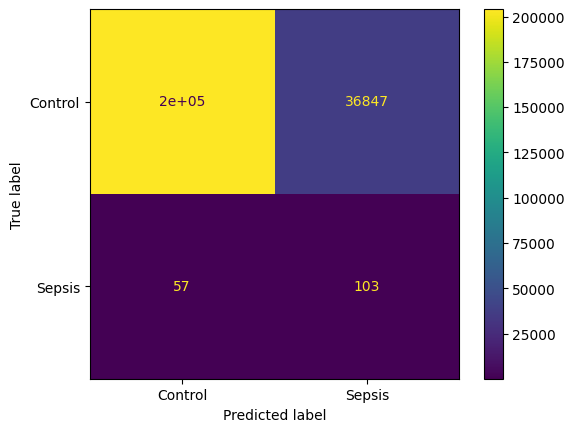

In [22]:
from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()
random_forest = RandomForestClassifier(class_weight={0: 0.0025, 1: 1}, max_leaf_nodes=79,
                           min_samples_leaf=0.0001,
                           min_samples_split=0.0055,
                           n_estimators=500, random_state=42, n_jobs=-1)
random_forest.fit(X_train[:, :7], y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(random_forest))
evaluation.plot_confusion_matrix(random_forest)
print(random_forest.feature_importances_)

## With mean features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()
random_forest = RandomForestClassifier(class_weight={0: 0.0025, 1: 1}, max_leaf_nodes=79,
                           min_samples_leaf=0.0001,
                           min_samples_split=0.0055,
                           n_estimators=500, random_state=42, n_jobs=-1)
random_forest.fit(X_train, y_train)
print(time.time() -start)
print(evaluation_mean.get_df_metrics(random_forest))
evaluation_mean.plot_confusion_matrix(random_forest)
print(random_forest.feature_importances_)

## With median features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()
random_forest = RandomForestClassifier(class_weight={0: 0.0025, 1: 1}, max_leaf_nodes=79,
                           min_samples_leaf=0.0001,
                           min_samples_split=0.0055,
                           n_estimators=500, random_state=42, n_jobs=-1)
random_forest.fit(X_train_median, y_train_median)
print(time.time() -start)
print(evaluation_median.get_df_metrics(random_forest))
evaluation_median.plot_confusion_matrix(random_forest)
print(random_forest.feature_importances_)

## With diff features

In [23]:
from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()
random_forest = RandomForestClassifier(class_weight={0: 0.0025, 1: 1}, max_leaf_nodes=79,
                           min_samples_leaf=0.0001,
                           min_samples_split=0.0055,
                           n_estimators=500, random_state=42, n_jobs=-1)
random_forest.fit(X_train_diff, y_train_diff)
print(time.time() -start)
print(evaluation_diff.get_df_metrics(random_forest))
# evaluation_median.plot_confusion_matrix(random_forest)
# print(random_forest.feature_importances_)

20.17617654800415
         Name       MCC  F1-Micro  F1-Macro  F1-Binary    AUROC     AUPRC
0     Leipzig  0.036033  0.969647  0.498101   0.011615  0.85358  0.009675
1  Greifswald  0.036033  0.969647  0.498101   0.011615  0.85358  0.009675


## XG Boost

0.8455374240875244
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.029170  0.991203  0.506629   0.017677  0.815624  0.007520
1  Greifswald  0.008793  0.992135  0.500196   0.004340  0.762645  0.001177


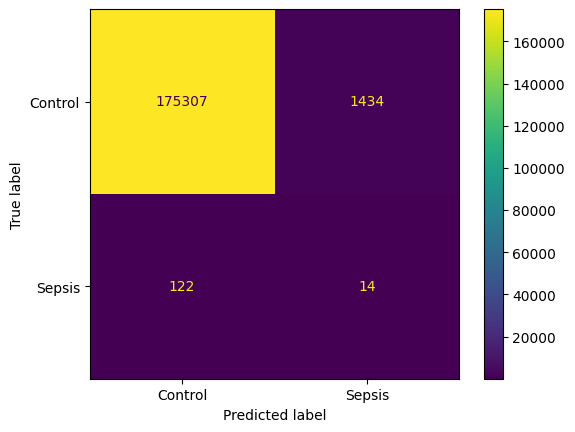

In [11]:
from xgboost import XGBClassifier
import time
start = time.time()
# xgb_classifier = XGBClassifier(tree_method='gpu_hist', 
#                            scale_pos_weight = 660,
#                            n_estimators=478,
#                            max_depth=2,
#                            eta=0.1,
#                            min_child_weight = 7,
#                            max_delta_step= 7,
#                            sampling_method= "uniform")
xgb_classifier = XGBClassifier(tree_method='gpu_hist', 
                           scale_pos_weight = 70,
                           n_estimators=1000,
                           max_depth=2,
                           eta=0.1,
                           min_child_weight = 7,
                           max_delta_step= 7,
                           sampling_method= "uniform")
xgb_classifier.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(xgb_classifier))
evaluation.plot_confusion_matrix(xgb_classifier)

## RUS Boost

/home/dwalke/.local/lib/python3.10/site-packages/imblearn/ensemble/_weight_boosting.py:271: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


65.51318550109863
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.037948  0.846537  0.461645   0.006442  0.830714  0.007231
1  Greifswald  0.023373  0.854036  0.462056   0.002858  0.814050  0.001503


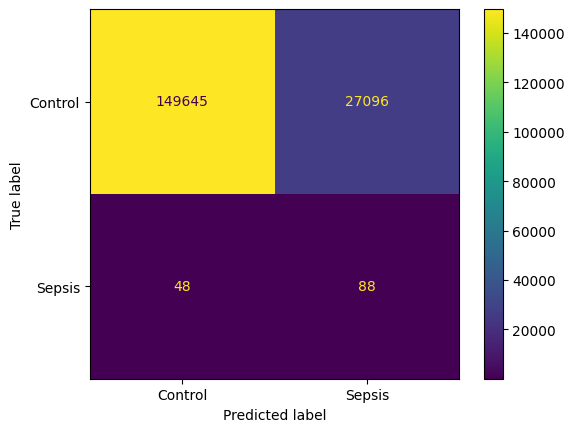

In [12]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time
start = time.time()
rus_boost = RUSBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=79, min_samples_leaf= 5, min_samples_split = 10),
                   learning_rate=0.90369, n_estimators=495,
                   random_state=1714400672, sampling_strategy=35/65)
rus_boost.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(rus_boost))
evaluation.plot_confusion_matrix(rus_boost)

## Grid Search

In [22]:
from sklearn.model_selection import GridSearchCV

def get_best_estimator(model, param_grid):
    grid = GridSearchCV(
    n_jobs=-1,
    cv=10,
    estimator=model,
    scoring=['roc_auc', "balanced_accuracy"],
    refit="balanced_accuracy",#'auroc',
    return_train_score=True,
    param_grid=param_grid,
    verbose= 10
    )
    grid.fit(X_train, y_train)
    return grid.best_estimator_
    

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'max_iter': [100, 1000, 10000],
    'class_weight': ["balanced", 35/65, 40/60, 45/55],
    "penalty":["l1", "l2", None, "elasticnet"],
    "solver":["liblinear", "saga", "newton-cholesky"]
}
logistic_regression = get_best_estimator(LogisticRegression(random_state=0), param_grid)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
                'class_weight': [{
                    0:i,
                    1: 1
                } for i in np.linspace(0.01, 0.01, 100)]
}
decision_tree = get_best_estimator(DecisionTreeClassifier(random_state=42, max_features=6, min_samples_leaf=0.005,
                       min_samples_split=0.03), param_grid)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid={
                'class_weight': [{
                    0:i,
                    1: 1
                } for i in np.linspace(0.0024, 0.0026, 4)],
        'n_estimators': range(495, 595, 10)
    }
random_forest = get_best_estimator(RandomForestClassifier(max_leaf_nodes=79,
                           min_samples_leaf=0.0001,
                           min_samples_split=0.0055,
                           n_estimators=500, random_state=42), param_grid)

In [24]:
un, counts = np.unique(y_train, return_counts=True)
counts[0]/counts[1]

864.0781483325037

In [25]:
from xgboost import XGBClassifier
param_grid = {
    'max_depth': [2],
    'learning_rate': [0.1],
    'gamma': [0],
    'reg_lambda': [10],
    'scale_pos_weight': [1, 2, 4, 8, 16, 30, 50, 100, 150, 200, 400, 500,550, 600, 650, 700, 800, 850, 900],
    "min_child_weight": [7],
    "max_delta_step": [6],
    'n_estimators': [2, 5, 10, 15, 20, 50, 80, 100, 200, 300, 400, 450, 500, 550, 600, 700, 750, 800, 900, 1000, 1200, 1400]
}
xgb_classifier = get_best_estimator(XGBClassifier(tree_method='gpu_hist', gpu_id = 0,
                                                        seed = 42), param_grid)

Fitting 10 folds for each of 418 candidates, totalling 4180 fits
[CV 5/10; 1/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=1
[CV 5/10; 1/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=1; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.648, test=0.629) total time=   9.7s
[CV 6/10; 7/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=50
[CV 6/10; 7/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=50; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.741, test=0.747) total time=   4.8s
[CV 3/10; 13/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda

[CV 7/10; 1/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=1
[CV 7/10; 1/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=1; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.644, test=0.660) total time=  10.2s
[CV 8/10; 7/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=50
[CV 8/10; 7/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=50; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.731, test=0.725) total time=   4.7s
[CV 2/10; 14/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=600
[CV 2/10; 14/418] END gamma=0, learning

[CV 2/10; 1/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=1
[CV 2/10; 1/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=1; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.646, test=0.634) total time=  10.1s
[CV 7/10; 7/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=50
[CV 7/10; 7/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=50; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.741, test=0.748) total time=   4.8s
[CV 1/10; 14/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=600
[CV 1/10; 14/418] END gamma=0, learning

[CV 9/10; 5/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=16
[CV 9/10; 5/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=16; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.724, test=0.749) total time=  13.0s
[CV 4/10; 8/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=100
[CV 4/10; 8/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=100; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.771, test=0.775) total time=   6.2s
[CV 8/10; 14/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=600
[CV 8/10; 14/418] END gamma=0, lear

[CV 2/10; 47/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=10, reg_lambda=10, scale_pos_weight=150
[CV 2/10; 47/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=10, reg_lambda=10, scale_pos_weight=150; balanced_accuracy: (train=0.620, test=0.610) roc_auc: (train=0.810, test=0.819) total time=   6.5s
[CV 6/10; 53/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=10, reg_lambda=10, scale_pos_weight=650
[CV 6/10; 53/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=10, reg_lambda=10, scale_pos_weight=650; balanced_accuracy: (train=0.732, test=0.738) roc_auc: (train=0.824, test=0.812) total time=   6.6s
[CV 10/10; 59/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=15, reg_lambda=10, scale_pos_weight=2
[CV 10/10; 59/418] END ga

[CV 3/10; 1/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=1
[CV 3/10; 1/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=1; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.644, test=0.649) total time=  10.7s
[CV 10/10; 7/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=50
[CV 10/10; 7/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=50; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.730, test=0.695) total time=   5.4s
[CV 3/10; 14/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=600
[CV 3/10; 14/418] END gamma=0, learni

[CV 9/10; 3/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=4
[CV 9/10; 3/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=4; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.724, test=0.750) total time=  14.8s
[CV 5/10; 9/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=150
[CV 5/10; 9/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=150; balanced_accuracy: (train=0.626, test=0.612) roc_auc: (train=0.773, test=0.762) total time=   5.8s
[CV 8/10; 15/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=650
[CV 8/10; 15/418] END gamma=0, learni

[CV 7/10; 2/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=2
[CV 7/10; 2/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=2; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.643, test=0.656) total time=  14.7s
[CV 9/10; 9/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=150
[CV 9/10; 9/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=150; balanced_accuracy: (train=0.624, test=0.629) roc_auc: (train=0.771, test=0.780) total time=   6.1s
[CV 4/10; 16/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=700
[CV 4/10; 16/418] END gamma=0, learni

[CV 4/10; 4/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=8
[CV 4/10; 4/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=8; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.714, test=0.712) total time=  14.7s
[CV 8/10; 10/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=200
[CV 8/10; 10/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=200; balanced_accuracy: (train=0.692, test=0.696) roc_auc: (train=0.772, test=0.765) total time=   5.9s
[CV 5/10; 16/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=700
[CV 5/10; 16/418] END gamma=0, lear

[CV 6/10; 1/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=1
[CV 6/10; 1/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=1; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.639, test=0.639) total time=  12.5s
[CV 1/10; 8/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=100
[CV 1/10; 8/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=100; balanced_accuracy: (train=0.616, test=0.618) roc_auc: (train=0.769, test=0.781) total time=   6.5s
[CV 6/10; 14/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=600
[CV 6/10; 14/418] END gamma=0, learni

[CV 1/10; 2/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=2
[CV 1/10; 2/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=2; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.637, test=0.646) total time=  14.8s
[CV 8/10; 9/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=150
[CV 8/10; 9/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=150; balanced_accuracy: (train=0.625, test=0.614) roc_auc: (train=0.772, test=0.765) total time=   6.4s
[CV 9/10; 16/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=700
[CV 9/10; 16/418] END gamma=0, learni

[CV 5/10; 5/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=16
[CV 5/10; 5/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=16; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.717, test=0.700) total time=  14.7s
[CV 8/10; 11/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=400
[CV 8/10; 11/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=400; balanced_accuracy: (train=0.711, test=0.712) roc_auc: (train=0.785, test=0.773) total time=   6.1s
[CV 10/10; 17/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=800
[CV 10/10; 17/418] END gamma=0, 

[CV 9/10; 4/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=8
[CV 9/10; 4/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=8; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.724, test=0.749) total time=  14.5s
[CV 10/10; 9/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=150
[CV 10/10; 9/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=150; balanced_accuracy: (train=0.616, test=0.603) roc_auc: (train=0.775, test=0.736) total time=   6.4s
[CV 5/10; 17/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=800
[CV 5/10; 17/418] END gamma=0, lear

[CV 6/10; 5/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=16
[CV 6/10; 5/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=16; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.725, test=0.735) total time=  14.9s
[CV 8/10; 12/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=500
[CV 8/10; 12/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=500; balanced_accuracy: (train=0.715, test=0.715) roc_auc: (train=0.789, test=0.771) total time=   6.3s
[CV 5/10; 18/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=850
[CV 5/10; 18/418] END gamma=0, le

[CV 1/10; 5/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=16
[CV 1/10; 5/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=16; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.726, test=0.730) total time=  14.8s
[CV 1/10; 13/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=550
[CV 1/10; 13/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=550; balanced_accuracy: (train=0.710, test=0.717) roc_auc: (train=0.784, test=0.793) total time=   6.4s
[CV 1/10; 19/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=900
[CV 1/10; 19/418] END gamma=0, le

[CV 2/10; 5/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=16
[CV 2/10; 5/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=16; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.727, test=0.717) total time=  14.5s
[CV 3/10; 10/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=200
[CV 3/10; 10/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=200; balanced_accuracy: (train=0.695, test=0.690) roc_auc: (train=0.774, test=0.781) total time=   6.1s
[CV 10/10; 16/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=700
[CV 10/10; 16/418] END gamma=0, 

[CV 3/10; 2/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=2
[CV 3/10; 2/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=2; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.644, test=0.649) total time=  14.7s
[CV 6/10; 10/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=200
[CV 6/10; 10/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=200; balanced_accuracy: (train=0.704, test=0.705) roc_auc: (train=0.772, test=0.760) total time=   6.3s
[CV 1/10; 18/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=850
[CV 1/10; 18/418] END gamma=0, lear

[CV 10/10; 1/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=1
[CV 10/10; 1/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=1; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.647, test=0.635) total time=  14.7s
[CV 1/10; 11/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=400
[CV 1/10; 11/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=400; balanced_accuracy: (train=0.710, test=0.716) roc_auc: (train=0.783, test=0.793) total time=   6.1s
[CV 4/10; 17/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=800
[CV 4/10; 17/418] END gamma=0, le

[CV 6/10; 2/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=2
[CV 6/10; 2/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=2; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.644, test=0.646) total time=  14.8s
[CV 10/10; 11/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=400
[CV 10/10; 11/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=400; balanced_accuracy: (train=0.714, test=0.683) roc_auc: (train=0.788, test=0.746) total time=   6.3s
[CV 8/10; 18/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=850
[CV 8/10; 18/418] END gamma=0, le

[CV 4/10; 6/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=30
[CV 4/10; 6/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=30; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.726, test=0.730) total time=  14.7s
[CV 1/10; 12/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=500
[CV 1/10; 12/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=500; balanced_accuracy: (train=0.710, test=0.717) roc_auc: (train=0.783, test=0.793) total time=   6.4s
[CV 6/10; 19/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=900
[CV 6/10; 19/418] END gamma=0, le

[CV 4/10; 7/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=50
[CV 4/10; 7/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=50; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.742, test=0.746) total time=  14.8s
[CV 9/10; 13/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=550
[CV 9/10; 13/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=550; balanced_accuracy: (train=0.705, test=0.718) roc_auc: (train=0.780, test=0.790) total time=   6.5s
[CV 3/10; 20/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=5, reg_lambda=10, scale_pos_weight=1
[CV 3/10; 20/418] END gamma=0, lear

[CV 3/10; 5/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=16
[CV 3/10; 5/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=16; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.717, test=0.706) total time=  14.6s
[CV 4/10; 11/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=400
[CV 4/10; 11/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=400; balanced_accuracy: (train=0.710, test=0.707) roc_auc: (train=0.783, test=0.787) total time=   6.3s
[CV 4/10; 18/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=850
[CV 4/10; 18/418] END gamma=0, le

[CV 9/10; 6/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=30
[CV 9/10; 6/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=30; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.739, test=0.762) total time=  14.7s
[CV 3/10; 12/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=500
[CV 3/10; 12/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=500; balanced_accuracy: (train=0.715, test=0.705) roc_auc: (train=0.783, test=0.791) total time=   6.5s
[CV 8/10; 19/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=900
[CV 8/10; 19/418] END gamma=0, le

[CV 3/10; 3/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=4
[CV 3/10; 3/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=4; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.727, test=0.720) total time=  14.7s
[CV 10/10; 13/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=550
[CV 10/10; 13/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=2, reg_lambda=10, scale_pos_weight=550; balanced_accuracy: (train=0.713, test=0.680) roc_auc: (train=0.785, test=0.741) total time=   6.5s
[CV 1/10; 20/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=5, reg_lambda=10, scale_pos_weight=1
[CV 1/10; 20/418] END gamma=0, lear

[CV 7/10; 123/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=150
[CV 7/10; 123/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=150; balanced_accuracy: (train=0.658, test=0.671) roc_auc: (train=0.858, test=0.847) total time=   7.0s
[CV 10/10; 129/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=650
[CV 10/10; 129/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=650; balanced_accuracy: (train=0.775, test=0.736) roc_auc: (train=0.863, test=0.820) total time=   8.7s
[CV 10/10; 135/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=2
[CV 10/10; 135/41

[CV 5/10; 126/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=500
[CV 5/10; 126/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=500; balanced_accuracy: (train=0.758, test=0.756) roc_auc: (train=0.860, test=0.857) total time=   7.6s
[CV 9/10; 132/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=850
[CV 9/10; 132/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=850; balanced_accuracy: (train=0.773, test=0.777) roc_auc: (train=0.858, test=0.858) total time=   7.1s
[CV 4/10; 139/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=30
[CV 4/10; 139/418] 

[CV 8/10; 126/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=500
[CV 8/10; 126/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=500; balanced_accuracy: (train=0.759, test=0.749) roc_auc: (train=0.861, test=0.840) total time=   8.1s
[CV 2/10; 133/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=900
[CV 2/10; 133/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=900; balanced_accuracy: (train=0.771, test=0.790) roc_auc: (train=0.856, test=0.869) total time=   6.8s
[CV 6/10; 139/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=30
[CV 6/10; 139/418] 

[CV 10/10; 128/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=600
[CV 10/10; 128/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=600; balanced_accuracy: (train=0.772, test=0.728) roc_auc: (train=0.863, test=0.820) total time=   9.0s
[CV 3/10; 135/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=2
[CV 3/10; 135/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=2; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.848, test=0.860) total time=   9.7s
[CV 5/10; 141/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=100
[CV 5/10; 141/418]

[CV 5/10; 129/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=650
[CV 5/10; 129/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=650; balanced_accuracy: (train=0.770, test=0.773) roc_auc: (train=0.860, test=0.857) total time=   8.9s
[CV 7/10; 135/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=2
[CV 7/10; 135/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=2; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.851, test=0.841) total time=  11.3s
[CV 1/10; 142/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=150
[CV 1/10; 142/418] E

[CV 7/10; 129/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=650
[CV 7/10; 129/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=650; balanced_accuracy: (train=0.773, test=0.759) roc_auc: (train=0.859, test=0.851) total time=   9.0s
[CV 9/10; 135/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=2
[CV 9/10; 135/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=2; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.851, test=0.851) total time=  11.6s
[CV 3/10; 142/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=150
[CV 3/10; 142/418] E

[CV 8/10; 129/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=650
[CV 8/10; 129/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=650; balanced_accuracy: (train=0.771, test=0.765) roc_auc: (train=0.860, test=0.840) total time=   8.9s
[CV 1/10; 136/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=4
[CV 1/10; 136/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=4; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.851, test=0.855) total time=  11.7s
[CV 5/10; 142/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=150
[CV 5/10; 142/418] E

[CV 7/10; 130/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=700
[CV 7/10; 130/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=700; balanced_accuracy: (train=0.775, test=0.755) roc_auc: (train=0.859, test=0.850) total time=   6.8s
[CV 1/10; 137/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=8
[CV 1/10; 137/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=8; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.852, test=0.855) total time=  12.1s
[CV 5/10; 143/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=200
[CV 5/10; 143/418] E

[CV 3/10; 131/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=800
[CV 3/10; 131/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=800; balanced_accuracy: (train=0.773, test=0.784) roc_auc: (train=0.857, test=0.867) total time=   7.6s
[CV 7/10; 137/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=8
[CV 7/10; 137/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=8; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.854, test=0.843) total time=  12.8s
[CV 8/10; 143/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=200
[CV 8/10; 143/418] E

[CV 5/10; 130/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=700
[CV 5/10; 130/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=700; balanced_accuracy: (train=0.774, test=0.776) roc_auc: (train=0.860, test=0.857) total time=   7.4s
[CV 9/10; 136/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=4
[CV 9/10; 136/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=4; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.852, test=0.851) total time=  12.1s
[CV 3/10; 143/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=200
[CV 3/10; 143/418] E

[CV 2/10; 131/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=800
[CV 2/10; 131/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=800; balanced_accuracy: (train=0.772, test=0.778) roc_auc: (train=0.857, test=0.870) total time=   7.9s
[CV 6/10; 137/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=8
[CV 6/10; 137/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=8; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.854, test=0.844) total time=  13.1s
[CV 9/10; 143/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=200
[CV 9/10; 143/418] E

[CV 3/10; 132/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=850
[CV 3/10; 132/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=850; balanced_accuracy: (train=0.773, test=0.783) roc_auc: (train=0.858, test=0.868) total time=   7.2s
[CV 6/10; 138/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=16
[CV 6/10; 138/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=16; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.855, test=0.843) total time=  13.2s
[CV 8/10; 144/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=400
[CV 8/10; 144/418]

[CV 1/10; 132/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=850
[CV 1/10; 132/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=850; balanced_accuracy: (train=0.774, test=0.771) roc_auc: (train=0.858, test=0.864) total time=   7.9s
[CV 2/10; 138/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=16
[CV 2/10; 138/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=16; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.853, test=0.864) total time=  13.3s
[CV 6/10; 144/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=400
[CV 6/10; 144/418]

[CV 5/10; 132/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=850
[CV 5/10; 132/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=850; balanced_accuracy: (train=0.776, test=0.771) roc_auc: (train=0.859, test=0.856) total time=   7.5s
[CV 9/10; 138/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=16
[CV 9/10; 138/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=16; balanced_accuracy: (train=0.501, test=0.500) roc_auc: (train=0.854, test=0.852) total time=  13.2s
[CV 5/10; 145/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=500
[CV 5/10; 145/418]

[CV 8/10; 133/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=900
[CV 8/10; 133/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=900; balanced_accuracy: (train=0.777, test=0.762) roc_auc: (train=0.860, test=0.841) total time=   7.1s
[CV 2/10; 140/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=50
[CV 2/10; 140/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=50; balanced_accuracy: (train=0.526, test=0.524) roc_auc: (train=0.855, test=0.867) total time=  11.7s
[CV 6/10; 146/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=550
[CV 6/10; 146/418]

[CV 4/10; 133/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=900
[CV 4/10; 133/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=900; balanced_accuracy: (train=0.773, test=0.759) roc_auc: (train=0.859, test=0.847) total time=   6.9s
[CV 7/10; 139/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=30
[CV 7/10; 139/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=30; balanced_accuracy: (train=0.504, test=0.506) roc_auc: (train=0.857, test=0.845) total time=  12.6s
[CV 1/10; 146/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=550
[CV 1/10; 146/418]

[CV 1/10; 133/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=900
[CV 1/10; 133/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=900; balanced_accuracy: (train=0.774, test=0.777) roc_auc: (train=0.858, test=0.864) total time=   6.9s
[CV 5/10; 139/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=30
[CV 5/10; 139/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=30; balanced_accuracy: (train=0.505, test=0.506) roc_auc: (train=0.857, test=0.855) total time=  13.0s
[CV 9/10; 145/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=500
[CV 9/10; 145/418]

[CV 4/10; 132/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=850
[CV 4/10; 132/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=850; balanced_accuracy: (train=0.774, test=0.763) roc_auc: (train=0.860, test=0.846) total time=   7.5s
[CV 8/10; 138/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=16
[CV 8/10; 138/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=16; balanced_accuracy: (train=0.501, test=0.500) roc_auc: (train=0.856, test=0.837) total time=  13.3s
[CV 1/10; 145/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=500
[CV 1/10; 145/418]

[CV 9/10; 131/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=800
[CV 9/10; 131/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=800; balanced_accuracy: (train=0.772, test=0.774) roc_auc: (train=0.858, test=0.857) total time=   8.0s
[CV 5/10; 138/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=16
[CV 5/10; 138/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=16; balanced_accuracy: (train=0.501, test=0.500) roc_auc: (train=0.854, test=0.852) total time=  13.4s
[CV 9/10; 144/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=400
[CV 9/10; 144/418]

[CV 3/10; 133/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=900
[CV 3/10; 133/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=900; balanced_accuracy: (train=0.774, test=0.782) roc_auc: (train=0.857, test=0.867) total time=   6.9s
[CV 8/10; 139/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=30
[CV 8/10; 139/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=30; balanced_accuracy: (train=0.506, test=0.500) roc_auc: (train=0.857, test=0.837) total time=  12.6s
[CV 3/10; 146/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=550
[CV 3/10; 146/418]

[CV 7/10; 133/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=900
[CV 7/10; 133/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=900; balanced_accuracy: (train=0.777, test=0.757) roc_auc: (train=0.859, test=0.850) total time=   7.0s
[CV 1/10; 140/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=50
[CV 1/10; 140/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=50; balanced_accuracy: (train=0.528, test=0.520) roc_auc: (train=0.856, test=0.859) total time=  11.8s
[CV 5/10; 146/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=550
[CV 5/10; 146/418]

[CV 5/10; 133/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=900
[CV 5/10; 133/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=900; balanced_accuracy: (train=0.777, test=0.772) roc_auc: (train=0.859, test=0.856) total time=   7.2s
[CV 9/10; 139/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=30
[CV 9/10; 139/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=30; balanced_accuracy: (train=0.506, test=0.504) roc_auc: (train=0.856, test=0.854) total time=  12.6s
[CV 2/10; 146/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=550
[CV 2/10; 146/418]

[CV 6/10; 133/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=900
[CV 6/10; 133/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=900; balanced_accuracy: (train=0.776, test=0.764) roc_auc: (train=0.860, test=0.849) total time=   6.9s
[CV 10/10; 139/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=30
[CV 10/10; 139/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=30; balanced_accuracy: (train=0.506, test=0.504) roc_auc: (train=0.859, test=0.817) total time=  12.3s
[CV 4/10; 146/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=550
[CV 4/10; 146/41

[CV 10/10; 133/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=900
[CV 10/10; 133/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=80, reg_lambda=10, scale_pos_weight=900; balanced_accuracy: (train=0.777, test=0.736) roc_auc: (train=0.862, test=0.820) total time=   7.6s
[CV 4/10; 140/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=50
[CV 4/10; 140/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=50; balanced_accuracy: (train=0.531, test=0.515) roc_auc: (train=0.859, test=0.848) total time=  11.1s
[CV 9/10; 146/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=550
[CV 9/10; 146/41

[CV 4/10; 135/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=2
[CV 4/10; 135/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=2; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.851, test=0.846) total time=  10.0s
[CV 7/10; 141/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=100
[CV 7/10; 141/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=100; balanced_accuracy: (train=0.621, test=0.626) roc_auc: (train=0.860, test=0.849) total time=   8.6s
[CV 7/10; 147/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=600
[CV 7/10; 147/418]

[CV 8/10; 135/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=2
[CV 8/10; 135/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=2; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.852, test=0.834) total time=  11.6s
[CV 2/10; 142/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=150
[CV 2/10; 142/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=150; balanced_accuracy: (train=0.664, test=0.640) roc_auc: (train=0.858, test=0.870) total time=   7.1s
[CV 6/10; 148/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=650
[CV 6/10; 148/418]

[CV 8/10; 134/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=1
[CV 8/10; 134/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=1; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.850, test=0.833) total time=   9.2s
[CV 2/10; 141/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=100
[CV 2/10; 141/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=100; balanced_accuracy: (train=0.618, test=0.606) roc_auc: (train=0.858, test=0.868) total time=   9.3s
[CV 6/10; 147/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=600
[CV 6/10; 147/418]

[CV 5/10; 135/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=2
[CV 5/10; 135/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=2; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.851, test=0.852) total time=  11.1s
[CV 9/10; 141/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=100
[CV 9/10; 141/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=100; balanced_accuracy: (train=0.619, test=0.618) roc_auc: (train=0.859, test=0.854) total time=   6.9s
[CV 3/10; 148/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=650
[CV 3/10; 148/418]

[CV 2/10; 135/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=2
[CV 2/10; 135/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=2; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.848, test=0.858) total time=   9.9s
[CV 8/10; 141/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=100
[CV 8/10; 141/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=100; balanced_accuracy: (train=0.623, test=0.625) roc_auc: (train=0.860, test=0.839) total time=   8.4s
[CV 2/10; 148/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=650
[CV 2/10; 148/418]

[CV 4/10; 137/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=8
[CV 4/10; 137/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=8; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.854, test=0.846) total time=  13.0s
[CV 10/10; 143/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=200
[CV 10/10; 143/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=200; balanced_accuracy: (train=0.696, test=0.658) roc_auc: (train=0.864, test=0.821) total time=   7.8s
[CV 5/10; 150/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=800
[CV 5/10; 150/41

[CV 5/10; 137/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=8
[CV 5/10; 137/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=8; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.854, test=0.852) total time=  13.1s
[CV 1/10; 144/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=400
[CV 1/10; 144/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=400; balanced_accuracy: (train=0.751, test=0.732) roc_auc: (train=0.861, test=0.865) total time=   7.9s
[CV 6/10; 150/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=100, reg_lambda=10, scale_pos_weight=800
[CV 6/10; 150/418]

[CV 8/10; 243/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=500, reg_lambda=10, scale_pos_weight=650; balanced_accuracy: (train=0.792, test=0.775) roc_auc: (train=0.882, test=0.853) total time= 1.1min
[CV 2/10; 250/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=4
[CV 2/10; 250/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=4; balanced_accuracy: (train=0.501, test=0.500) roc_auc: (train=0.874, test=0.871) total time= 1.3min
[CV 6/10; 256/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=150
[CV 6/10; 256/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=150; balanced_accuracy: 

[CV 3/10; 248/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=1; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.872, test=0.876) total time= 1.1min
[CV 7/10; 254/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=50
[CV 7/10; 254/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=50; balanced_accuracy: (train=0.563, test=0.566) roc_auc: (train=0.879, test=0.862) total time=  53.4s
[CV 1/10; 261/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=600
[CV 1/10; 261/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=600; balanced_accuracy: 

[CV 6/10; 249/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=2; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.874, test=0.861) total time= 1.3min
[CV 10/10; 255/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=100
[CV 10/10; 255/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=100; balanced_accuracy: (train=0.652, test=0.604) roc_auc: (train=0.883, test=0.833) total time=  57.9s
[CV 4/10; 262/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=650
[CV 4/10; 262/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=650; balanced_accura

[CV 5/10; 249/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=2; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.874, test=0.861) total time= 1.3min
[CV 9/10; 255/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=100
[CV 9/10; 255/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=100; balanced_accuracy: (train=0.643, test=0.632) roc_auc: (train=0.880, test=0.865) total time=  57.8s
[CV 3/10; 262/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=650
[CV 3/10; 262/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=650; balanced_accuracy

[CV 9/10; 250/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=4; balanced_accuracy: (train=0.501, test=0.500) roc_auc: (train=0.875, test=0.865) total time= 1.3min
[CV 3/10; 257/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=200
[CV 3/10; 257/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=200; balanced_accuracy: (train=0.714, test=0.708) roc_auc: (train=0.879, test=0.877) total time= 1.2min
[CV 7/10; 263/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=700
[CV 7/10; 263/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=700; balanced_accuracy

[CV 8/10; 251/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=8; balanced_accuracy: (train=0.502, test=0.500) roc_auc: (train=0.876, test=0.852) total time= 1.3min
[CV 2/10; 258/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=400
[CV 2/10; 258/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=400; balanced_accuracy: (train=0.768, test=0.756) roc_auc: (train=0.881, test=0.874) total time= 1.3min
[CV 6/10; 264/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=800
[CV 6/10; 264/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=800; balanced_accuracy

[CV 1/10; 251/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=8; balanced_accuracy: (train=0.502, test=0.500) roc_auc: (train=0.875, test=0.870) total time= 1.3min
[CV 5/10; 257/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=200
[CV 5/10; 257/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=200; balanced_accuracy: (train=0.716, test=0.693) roc_auc: (train=0.882, test=0.863) total time= 1.2min
[CV 9/10; 263/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=700
[CV 9/10; 263/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=700; balanced_accuracy

[CV 8/10; 250/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=4; balanced_accuracy: (train=0.501, test=0.500) roc_auc: (train=0.875, test=0.851) total time= 1.3min
[CV 2/10; 257/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=200
[CV 2/10; 257/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=200; balanced_accuracy: (train=0.717, test=0.683) roc_auc: (train=0.880, test=0.875) total time= 1.2min
[CV 6/10; 263/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=700
[CV 6/10; 263/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=700; balanced_accuracy

[CV 4/10; 251/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=8; balanced_accuracy: (train=0.502, test=0.502) roc_auc: (train=0.877, test=0.849) total time= 1.3min
[CV 8/10; 257/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=200
[CV 8/10; 257/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=200; balanced_accuracy: (train=0.716, test=0.705) roc_auc: (train=0.882, test=0.853) total time= 1.2min
[CV 2/10; 264/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=800
[CV 2/10; 264/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=800; balanced_accuracy

[CV 9/10; 251/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=8; balanced_accuracy: (train=0.502, test=0.502) roc_auc: (train=0.876, test=0.866) total time= 1.3min
[CV 3/10; 258/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=400
[CV 3/10; 258/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=400; balanced_accuracy: (train=0.768, test=0.764) roc_auc: (train=0.881, test=0.876) total time= 1.3min
[CV 7/10; 264/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=800
[CV 7/10; 264/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=800; balanced_accuracy

[CV 3/10; 252/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=16; balanced_accuracy: (train=0.506, test=0.507) roc_auc: (train=0.875, test=0.875) total time= 1.3min
[CV 6/10; 258/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=400
[CV 6/10; 258/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=400; balanced_accuracy: (train=0.770, test=0.755) roc_auc: (train=0.882, test=0.865) total time= 1.3min
[CV 9/10; 264/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=800
[CV 9/10; 264/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=800; balanced_accurac

[CV 10/10; 253/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=30; balanced_accuracy: (train=0.529, test=0.518) roc_auc: (train=0.881, test=0.833) total time= 1.1min
[CV 3/10; 260/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=550
[CV 3/10; 260/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=550; balanced_accuracy: (train=0.785, test=0.787) roc_auc: (train=0.881, test=0.876) total time= 1.3min
[CV 7/10; 266/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=900
[CV 7/10; 266/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=900; balanced_accura

[CV 9/10; 253/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=30; balanced_accuracy: (train=0.526, test=0.518) roc_auc: (train=0.878, test=0.866) total time= 1.1min
[CV 4/10; 260/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=550
[CV 4/10; 260/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=550; balanced_accuracy: (train=0.785, test=0.759) roc_auc: (train=0.883, test=0.849) total time= 1.3min
[CV 8/10; 266/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=900
[CV 8/10; 266/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=900; balanced_accurac

[CV 1/10; 254/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=50; balanced_accuracy: (train=0.566, test=0.550) roc_auc: (train=0.878, test=0.871) total time= 1.1min
[CV 5/10; 260/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=550
[CV 5/10; 260/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=550; balanced_accuracy: (train=0.786, test=0.767) roc_auc: (train=0.883, test=0.864) total time= 1.3min
[CV 9/10; 266/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=900
[CV 9/10; 266/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=900; balanced_accurac

[CV 4/10; 254/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=50; balanced_accuracy: (train=0.566, test=0.548) roc_auc: (train=0.880, test=0.848) total time= 1.0min
[CV 6/10; 260/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=550
[CV 6/10; 260/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=550; balanced_accuracy: (train=0.786, test=0.766) roc_auc: (train=0.882, test=0.865) total time= 1.3min
[CV 10/10; 266/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=900
[CV 10/10; 266/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=900; balanced_accur

[CV 10/10; 252/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=16; balanced_accuracy: (train=0.507, test=0.505) roc_auc: (train=0.880, test=0.833) total time= 1.2min
[CV 6/10; 259/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=500
[CV 6/10; 259/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=500; balanced_accuracy: (train=0.782, test=0.762) roc_auc: (train=0.882, test=0.865) total time= 1.3min
[CV 10/10; 265/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=850
[CV 10/10; 265/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=850; balanced_accu

[CV 6/10; 253/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=30; balanced_accuracy: (train=0.528, test=0.513) roc_auc: (train=0.878, test=0.863) total time= 1.1min
[CV 10/10; 259/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=500
[CV 10/10; 259/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=500; balanced_accuracy: (train=0.784, test=0.729) roc_auc: (train=0.885, test=0.833) total time= 1.3min
[CV 4/10; 266/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=900
[CV 4/10; 266/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=900; balanced_accur

[CV 6/10; 254/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=50; balanced_accuracy: (train=0.566, test=0.545) roc_auc: (train=0.879, test=0.864) total time=  56.6s
[CV 9/10; 260/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=550
[CV 9/10; 260/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=550; balanced_accuracy: (train=0.787, test=0.769) roc_auc: (train=0.882, test=0.866) total time= 1.2min
[CV 3/10; 267/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=1
[CV 3/10; 267/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=1; balanced_accuracy: (

[CV 2/10; 254/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=50; balanced_accuracy: (train=0.563, test=0.556) roc_auc: (train=0.878, test=0.873) total time= 1.0min
[CV 8/10; 260/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=550
[CV 8/10; 260/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=550; balanced_accuracy: (train=0.788, test=0.771) roc_auc: (train=0.883, test=0.854) total time= 1.3min
[CV 2/10; 267/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=1
[CV 2/10; 267/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=1; balanced_accuracy: (

[CV 1/10; 255/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=100; balanced_accuracy: (train=0.644, test=0.620) roc_auc: (train=0.880, test=0.872) total time=  52.6s
[CV 5/10; 261/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=600
[CV 5/10; 261/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=600; balanced_accuracy: (train=0.790, test=0.777) roc_auc: (train=0.883, test=0.864) total time= 1.1min
[CV 9/10; 267/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=1
[CV 9/10; 267/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=1; balanced_accuracy: 

[CV 5/10; 254/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=50; balanced_accuracy: (train=0.566, test=0.554) roc_auc: (train=0.879, test=0.862) total time=  56.7s
[CV 10/10; 260/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=550
[CV 10/10; 260/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=550; balanced_accuracy: (train=0.791, test=0.734) roc_auc: (train=0.885, test=0.833) total time= 1.2min
[CV 4/10; 267/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=1
[CV 4/10; 267/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=1; balanced_accuracy:

[CV 8/10; 255/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=100; balanced_accuracy: (train=0.646, test=0.638) roc_auc: (train=0.880, test=0.852) total time=  54.8s
[CV 2/10; 262/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=650
[CV 2/10; 262/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=650; balanced_accuracy: (train=0.792, test=0.777) roc_auc: (train=0.881, test=0.874) total time= 1.1min
[CV 6/10; 268/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=2
[CV 6/10; 268/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=2; balanced_accuracy: 

[CV 1/10; 256/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=150; balanced_accuracy: (train=0.687, test=0.664) roc_auc: (train=0.881, test=0.871) total time=  58.9s
[CV 5/10; 262/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=650
[CV 5/10; 262/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=650; balanced_accuracy: (train=0.792, test=0.773) roc_auc: (train=0.883, test=0.863) total time=  59.4s
[CV 9/10; 268/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=2
[CV 9/10; 268/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=2; balanced_accuracy: 

[CV 3/10; 256/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=150; balanced_accuracy: (train=0.686, test=0.689) roc_auc: (train=0.879, test=0.877) total time=  59.8s
[CV 7/10; 262/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=650
[CV 7/10; 262/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=650; balanced_accuracy: (train=0.794, test=0.777) roc_auc: (train=0.882, test=0.863) total time=  58.2s
[CV 2/10; 269/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=4
[CV 2/10; 269/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=4; balanced_accuracy: 

[CV 5/10; 256/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=150; balanced_accuracy: (train=0.688, test=0.666) roc_auc: (train=0.881, test=0.863) total time= 1.0min
[CV 9/10; 262/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=650
[CV 9/10; 262/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=650; balanced_accuracy: (train=0.793, test=0.776) roc_auc: (train=0.882, test=0.866) total time=  56.6s
[CV 3/10; 269/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=4
[CV 3/10; 269/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=4; balanced_accuracy: 

[CV 3/10; 255/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=100; balanced_accuracy: (train=0.643, test=0.631) roc_auc: (train=0.879, test=0.876) total time=  52.7s
[CV 7/10; 261/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=600
[CV 7/10; 261/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=600; balanced_accuracy: (train=0.791, test=0.771) roc_auc: (train=0.882, test=0.863) total time= 1.1min
[CV 1/10; 268/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=2
[CV 1/10; 268/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=2; balanced_accuracy: 

[CV 1/10; 257/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=200; balanced_accuracy: (train=0.717, test=0.693) roc_auc: (train=0.881, test=0.872) total time= 1.2min
[CV 4/10; 263/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=700
[CV 4/10; 263/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=700; balanced_accuracy: (train=0.796, test=0.765) roc_auc: (train=0.883, test=0.848) total time=  52.8s
[CV 8/10; 269/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=4
[CV 8/10; 269/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=4; balanced_accuracy: 

[CV 6/10; 257/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=200; balanced_accuracy: (train=0.717, test=0.706) roc_auc: (train=0.881, test=0.865) total time= 1.2min
[CV 10/10; 263/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=700
[CV 10/10; 263/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=700; balanced_accuracy: (train=0.797, test=0.746) roc_auc: (train=0.885, test=0.832) total time=  54.9s
[CV 4/10; 270/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=8
[CV 4/10; 270/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=8; balanced_accuracy

[CV 9/10; 258/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=400; balanced_accuracy: (train=0.771, test=0.760) roc_auc: (train=0.882, test=0.866) total time= 1.3min
[CV 1/10; 265/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=850
[CV 1/10; 265/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=850; balanced_accuracy: (train=0.796, test=0.779) roc_auc: (train=0.882, test=0.872) total time= 1.1min
[CV 4/10; 271/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=16
[CV 4/10; 271/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=16; balanced_accuracy

[CV 10/10; 257/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=200; balanced_accuracy: (train=0.722, test=0.671) roc_auc: (train=0.884, test=0.833) total time= 1.3min
[CV 4/10; 264/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=800
[CV 4/10; 264/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=800; balanced_accuracy: (train=0.800, test=0.762) roc_auc: (train=0.883, test=0.848) total time=  58.3s
[CV 8/10; 270/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=8
[CV 8/10; 270/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=8; balanced_accuracy:

[CV 2/10; 259/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=500; balanced_accuracy: (train=0.781, test=0.766) roc_auc: (train=0.881, test=0.875) total time= 1.3min
[CV 6/10; 265/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=850
[CV 6/10; 265/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=850; balanced_accuracy: (train=0.798, test=0.783) roc_auc: (train=0.882, test=0.865) total time= 1.2min
[CV 10/10; 271/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=16
[CV 10/10; 271/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=16; balanced_accura

[CV 7/10; 258/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=400; balanced_accuracy: (train=0.770, test=0.763) roc_auc: (train=0.882, test=0.863) total time= 1.3min
[CV 4/10; 265/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=850
[CV 4/10; 265/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=550, reg_lambda=10, scale_pos_weight=850; balanced_accuracy: (train=0.801, test=0.768) roc_auc: (train=0.883, test=0.849) total time= 1.2min
[CV 8/10; 271/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=16
[CV 8/10; 271/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=16; balanced_accuracy

[CV 2/10; 380/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=900
[CV 2/10; 380/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=900; balanced_accuracy: (train=0.807, test=0.786) roc_auc: (train=0.890, test=0.874) total time= 2.1min
[CV 6/10; 386/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=30
[CV 6/10; 386/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=30; balanced_accuracy: (train=0.536, test=0.516) roc_auc: (train=0.887, test=0.867) total time= 2.6min
[CV 1/10; 393/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=550
[CV 1/10; 3

[CV 5/10; 381/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=1
[CV 5/10; 381/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=1; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.882, test=0.863) total time= 2.6min
[CV 9/10; 387/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=50
[CV 9/10; 387/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=50; balanced_accuracy: (train=0.579, test=0.557) roc_auc: (train=0.888, test=0.869) total time= 2.1min
[CV 2/10; 394/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=600
[CV 2/10; 394/4

[CV 3/10; 381/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=1
[CV 3/10; 381/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=1; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.881, test=0.877) total time= 2.6min
[CV 7/10; 387/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=50
[CV 7/10; 387/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=50; balanced_accuracy: (train=0.575, test=0.566) roc_auc: (train=0.889, test=0.866) total time= 2.1min
[CV 3/10; 394/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=600
[CV 3/10; 394/4

[CV 9/10; 381/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=1
[CV 9/10; 381/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=1; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.882, test=0.868) total time= 2.7min
[CV 3/10; 388/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=100
[CV 3/10; 388/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=100; balanced_accuracy: (train=0.652, test=0.636) roc_auc: (train=0.889, test=0.874) total time= 2.1min
[CV 7/10; 394/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=600
[CV 7/10; 394

[CV 6/10; 383/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=4
[CV 6/10; 383/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=4; balanced_accuracy: (train=0.501, test=0.500) roc_auc: (train=0.884, test=0.867) total time= 2.9min
[CV 9/10; 389/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=150
[CV 9/10; 389/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=150; balanced_accuracy: (train=0.701, test=0.670) roc_auc: (train=0.891, test=0.868) total time= 2.5min
[CV 3/10; 396/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=700
[CV 3/10; 396

[CV 4/10; 382/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=2
[CV 4/10; 382/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=2; balanced_accuracy: (train=0.500, test=0.501) roc_auc: (train=0.884, test=0.850) total time= 2.8min
[CV 8/10; 388/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=100
[CV 8/10; 388/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=100; balanced_accuracy: (train=0.653, test=0.635) roc_auc: (train=0.891, test=0.855) total time= 2.3min
[CV 2/10; 395/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=650
[CV 2/10; 395

[CV 8/10; 382/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=2
[CV 8/10; 382/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=2; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.884, test=0.855) total time= 2.9min
[CV 1/10; 389/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=150
[CV 1/10; 389/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=150; balanced_accuracy: (train=0.699, test=0.670) roc_auc: (train=0.891, test=0.871) total time= 2.4min
[CV 6/10; 395/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=650
[CV 6/10; 395

[CV 7/10; 376/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=650
[CV 7/10; 376/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=650; balanced_accuracy: (train=0.800, test=0.777) roc_auc: (train=0.891, test=0.866) total time= 2.2min
[CV 1/10; 383/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=4
[CV 1/10; 383/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=4; balanced_accuracy: (train=0.502, test=0.500) roc_auc: (train=0.884, test=0.871) total time= 2.9min
[CV 7/10; 389/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=150
[CV 7/10; 389

[CV 7/10; 382/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=2
[CV 7/10; 382/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=2; balanced_accuracy: (train=0.500, test=0.500) roc_auc: (train=0.883, test=0.865) total time= 2.9min
[CV 3/10; 389/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=150
[CV 3/10; 389/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=150; balanced_accuracy: (train=0.697, test=0.681) roc_auc: (train=0.890, test=0.874) total time= 2.4min
[CV 7/10; 395/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=650
[CV 7/10; 395

[CV 8/10; 378/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=800
[CV 8/10; 378/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=800; balanced_accuracy: (train=0.808, test=0.769) roc_auc: (train=0.892, test=0.855) total time= 2.1min
[CV 1/10; 385/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=16
[CV 1/10; 385/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=16; balanced_accuracy: (train=0.511, test=0.506) roc_auc: (train=0.886, test=0.872) total time= 2.8min
[CV 5/10; 391/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=400
[CV 5/10; 3

[CV 6/10; 384/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=8
[CV 6/10; 384/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=8; balanced_accuracy: (train=0.503, test=0.500) roc_auc: (train=0.885, test=0.867) total time= 2.9min
[CV 1/10; 391/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=400
[CV 1/10; 391/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=400; balanced_accuracy: (train=0.780, test=0.746) roc_auc: (train=0.893, test=0.870) total time= 2.8min
[CV 5/10; 397/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=800
[CV 5/10; 397

[CV 1/10; 379/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=850
[CV 1/10; 379/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=850; balanced_accuracy: (train=0.806, test=0.781) roc_auc: (train=0.891, test=0.870) total time= 2.1min
[CV 5/10; 385/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=16
[CV 5/10; 385/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=16; balanced_accuracy: (train=0.512, test=0.510) roc_auc: (train=0.887, test=0.861) total time= 2.8min
[CV 9/10; 391/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=400
[CV 9/10; 3

[CV 7/10; 378/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=800
[CV 7/10; 378/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=800; balanced_accuracy: (train=0.807, test=0.777) roc_auc: (train=0.891, test=0.865) total time= 2.1min
[CV 2/10; 385/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=16
[CV 2/10; 385/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=16; balanced_accuracy: (train=0.511, test=0.506) roc_auc: (train=0.886, test=0.871) total time= 2.8min
[CV 6/10; 391/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=400
[CV 6/10; 3

[CV 2/10; 386/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=30
[CV 2/10; 386/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=30; balanced_accuracy: (train=0.535, test=0.528) roc_auc: (train=0.887, test=0.871) total time= 2.7min
[CV 4/10; 392/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=500
[CV 4/10; 392/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=500; balanced_accuracy: (train=0.792, test=0.757) roc_auc: (train=0.894, test=0.849) total time= 2.9min
[CV 7/10; 398/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=850
[CV 7/10; 3

[CV 1/10; 380/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=900
[CV 1/10; 380/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=900; balanced_accuracy: (train=0.807, test=0.776) roc_auc: (train=0.891, test=0.870) total time= 2.1min
[CV 5/10; 386/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=30
[CV 5/10; 386/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=30; balanced_accuracy: (train=0.535, test=0.519) roc_auc: (train=0.888, test=0.863) total time= 2.6min
[CV 8/10; 392/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=500
[CV 8/10; 3

[CV 3/10; 379/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=850
[CV 3/10; 379/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=850; balanced_accuracy: (train=0.807, test=0.791) roc_auc: (train=0.890, test=0.871) total time= 2.1min
[CV 7/10; 385/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=16
[CV 7/10; 385/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=16; balanced_accuracy: (train=0.510, test=0.506) roc_auc: (train=0.886, test=0.866) total time= 2.8min
[CV 2/10; 392/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=500
[CV 2/10; 3

[CV 7/10; 380/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=900
[CV 7/10; 380/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=900; balanced_accuracy: (train=0.809, test=0.783) roc_auc: (train=0.891, test=0.865) total time= 2.1min
[CV 1/10; 387/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=50
[CV 1/10; 387/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=50; balanced_accuracy: (train=0.577, test=0.559) roc_auc: (train=0.888, test=0.872) total time= 2.5min
[CV 5/10; 393/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=550
[CV 5/10; 3

[CV 5/10; 379/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=850
[CV 5/10; 379/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=850; balanced_accuracy: (train=0.808, test=0.777) roc_auc: (train=0.892, test=0.862) total time= 2.1min
[CV 9/10; 385/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=16
[CV 9/10; 385/418] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=16; balanced_accuracy: (train=0.512, test=0.505) roc_auc: (train=0.886, test=0.869) total time= 2.7min
[CV 3/10; 392/418] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=500
[CV 3/10; 3